# Multiple regression model  predicting infalation 

## Ibrahim Shedoh
## 23/09/2024

In [59]:
#importing neccessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# we will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [61]:
# reading dataset
df=pd.read_csv("inflation data.csv")
df.head(10)# head of the dataset

,YEARS,ANNUAL GDP GROWTH RATES(%),AVARAGE ANNUAL EXCHANGE RATES (KSHS vs USD),ANNUAL CPI RATES(%),ANNUAL INTEREST(LENDING) RATES(%),ANNUAL INFLATION RATES (%)
0,1971.0,22.17,7.14,0.93,9.00,3.78
1,1972.0,17.08,7.14,0.98,9.00,5.83
2,1973.0,5.90,7.00,1.07,9.00,9.28
3,1974.0,4.07,7.14,1.26,9.50,17.81
4,1975.0,0.88,7.34,1.50,10.00,19.12
5,1976.0,2.15,8.37,1.68,10.00,11.45
6,1977.0,9.45,8.28,1.92,10.00,14.82
7,1978.0,6.91,7.73,2.25,10.00,16.93
8,1979.0,7.62,7.48,2.43,10.00,7.98
9,1980.0,5.59,7.42,2.77,10.58,13.86


In [62]:
#the last five row of the data
df.tail(5)

,YEARS,ANNUAL GDP GROWTH RATES(%),AVARAGE ANNUAL EXCHANGE RATES (KSHS vs USD),ANNUAL CPI RATES(%),ANNUAL INTEREST(LENDING) RATES(%),ANNUAL INFLATION RATES (%)
49,2020.0,-0.27,106.45,200.23,12.00,5.40
50,2021.0,7.59,109.64,212.47,12.08,6.11
51,2022.0,4.85,117.87,228.74,12.34,7.66
52,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#droping raws 
df.drop([52,53], inplace=True)

In [64]:
 # shape of the data set
df.shape

(52, 6)

In [65]:
 # correlation of the data set
df.corr()

,YEARS,ANNUAL GDP GROWTH RATES(%),AVARAGE ANNUAL EXCHANGE RATES (KSHS vs USD),ANNUAL CPI RATES(%),ANNUAL INTEREST(LENDING) RATES(%),ANNUAL INFLATION RATES (%)
YEARS,1.000000,-0.246014,0.971440,0.901297,0.170718,-0.258990
ANNUAL GDP GROWTH RATES(%),-0.246014,1.000000,-0.208775,-0.060637,-0.410359,-0.365845
AVARAGE ANNUAL EXCHANGE RATES (KSHS vs USD),0.971440,-0.208775,1.000000,0.880911,0.215479,-0.267219
ANNUAL CPI RATES(%),0.901297,-0.060637,0.880911,1.000000,-0.099706,-0.326981
ANNUAL INTEREST(LENDING) RATES(%),0.170718,-0.410359,0.215479,-0.099706,1.000000,0.261539
ANNUAL INFLATION RATES (%),-0.258990,-0.365845,-0.267219,-0.326981,0.261539,1.000000


In [66]:
#the description of the dataset 
df.describe()

,YEARS,ANNUAL GDP GROWTH RATES(%),AVARAGE ANNUAL EXCHANGE RATES (KSHS vs USD),ANNUAL CPI RATES(%),ANNUAL INTEREST(LENDING) RATES(%),ANNUAL INFLATION RATES (%)
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1996.500000,4.599423,52.343654,57.376538,16.301923,11.505962
std,15.154757,3.875853,36.625405,67.618047,6.524063,7.880084
min,1971.000000,-0.800000,7.000000,0.930000,9.000000,1.550000
25%,1983.750000,2.270000,14.135000,4.472500,12.400000,6.252500
50%,1996.500000,4.255000,58.365000,29.125000,14.395000,9.790000
75%,2009.250000,5.902500,79.185000,97.142500,18.525000,13.900000
max,2022.000000,22.170000,117.870000,228.740000,36.240000,45.980000


In [67]:
# renaming column name
df.rename(columns={df.columns[1]:'Growth_Rates', df.columns[2]:'Exchange_Rates',df.columns[3]:'CPI_Rates',df.columns[4]:'Lending_rates',df.columns[5]:'Inflation_rates'}, inplace=True)
df.head()

,YEARS,Growth_Rates,Exchange_Rates,CPI_Rates,Lending_rates,Inflation_rates
0,1971.0,22.17,7.14,0.93,9.0,3.78
1,1972.0,17.08,7.14,0.98,9.0,5.83
2,1973.0,5.90,7.00,1.07,9.0,9.28
3,1974.0,4.07,7.14,1.26,9.5,17.81
4,1975.0,0.88,7.34,1.50,10.0,19.12


In [68]:
# missing vales 
df.isnull().sum()

YEARS              0
Growth_Rates       0
Exchange_Rates     0
CPI_Rates          0
Lending_rates      0
Inflation_rates    0
dtype: int64

In [69]:
# % of missing values
df.isnull().sum()/df.shape[0]*100

YEARS              0.0
Growth_Rates       0.0
Exchange_Rates     0.0
CPI_Rates          0.0
Lending_rates      0.0
Inflation_rates    0.0
dtype: float64

In [70]:
# duplictes in the dataset
df.duplicated().sum()

0

array([[<Axes: title={'center': 'YEARS'}>,
        <Axes: title={'center': 'Growth_Rates'}>],
       [<Axes: title={'center': 'Exchange_Rates'}>,
        <Axes: title={'center': 'CPI_Rates'}>],
       [<Axes: title={'center': 'Lending_rates'}>,
        <Axes: title={'center': 'Inflation_rates'}>]], dtype=object)

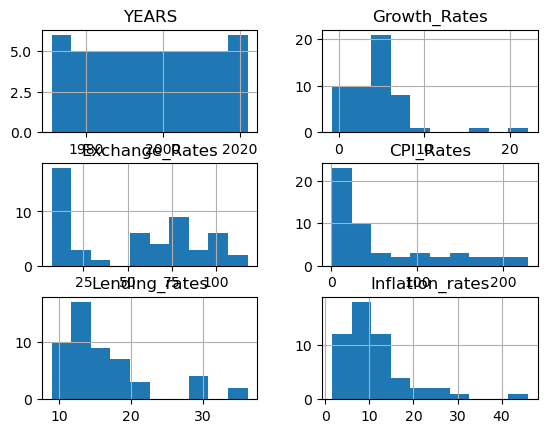

In [71]:
## EDA
# histogram
df.hist()

## Model Building 

In [72]:
# selecting variables 
X=df[['Growth_Rates','Exchange_Rates','CPI_Rates','Lending_rates']]
y=df['Inflation_rates']

In [73]:
# splitting dataset into traing and test 
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=100)

In [74]:
y_test.shape

(11,)

In [75]:
X_train.shape

(41, 4)

In [76]:
# regression model function
rml=linear_model.LinearRegression()

In [77]:
# fitting the mlrm
rml=linear_model.LinearRegression().fit(X_train, y_train)

In [78]:
#intercept
rml.intercept_

12.538005794721201

In [79]:
# coeffients
list(zip(X, rml.coef_))

[('Growth_Rates', -0.776881032050755),
 ('Exchange_Rates', -0.16793117537246557),
 ('CPI_Rates', 0.04244579673321747),
 ('Lending_rates', 0.5458852040760552)]

### predictions

In [80]:
#Predicting the Test and Train set result 
y_pred= rml.predict(X_test)  
x_pred= rml.predict(X_train) 
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 9.34635788  8.46824972  9.13901537  5.54705234  4.25746439  5.42136011
 14.99228862 20.12596271 19.33866729  8.03865278  6.29508309]


In [81]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
6,14.82,9.346358
32,9.82,8.468250
38,9.23,9.139015
35,14.45,5.547052
33,11.62,4.257464
51,7.66,5.421360
5,11.45,14.992289
26,11.36,20.125963
25,8.86,19.338667
45,6.30,8.038653


In [82]:
# mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 4.636468605949198


In [83]:
# mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Square Error:', mse)

Mean Square Error: 33.96415218557568


In [84]:
# R squared
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', r2)
df.columns

Root Mean Square Error: 5.827877159444567


Index(['YEARS', 'Growth_Rates', 'Exchange_Rates', 'CPI_Rates', 'Lending_rates',
       'Inflation_rates'],
      dtype='object')

In [86]:
# Get input from the user
Growth_Rates= float(input("Enter the the the growth rate: "))  # Convert to float for consistency
Exchange_Rates = float(input("Enter the exchange rate: "))
CPI_Rates = float(input("Enter the CPI: "))
Lending_rates= float(input("Enter the lending rates"))

# Create a dictionary with input values
input_data = {
    'Growth_Rates': [Growth_Rates],
    'Exchange_Rates': [Exchange_Rates],
    'CPI_Rates': [CPI_Rates],
    'Lending_rates': [Lending_rates]
}

# Convert the dictionary to a DataFrame and then access the values
input_df = pd.DataFrame.from_dict(input_data)

# Predict using the model
model=12.538-(0.76881*Growth_Rates)-(0.1679*Exchange_Rates)+(0.04225*CPI_Rates)+(0.545855*Lending_rates)
print("The annual inflation rate is : ",model)





Enter the the the growth rate:  6
Enter the exchange rate:  8
Enter the CPI:  4
Enter the lending rates 3


The annual inflation rate is :  8.388505
